<a href="https://colab.research.google.com/github/sijuswamy/PyWorks/blob/main/Visualization_tools_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Session Outcome:** Upon successful completion of this session, the participants will be able to:

- understand importance of visualization in data science
- use popular `Python` tools for visualization

## Background

Data visualization is important for many analytical tasks including data summarization, exploratory data analysis and model output analysis. One of the easiest ways to communicate your findings with other people is through a good visualization. Fortunately, `Python` features many libraries that provide useful tools for gaining insights from data. The most well-known of these, `Matplotlib`, enables users to generate visualizations like histograms, scatterplots, bar charts, pie charts and much more.

`Seaborn` is another useful visualization library that is built on top of `Matplotlib`. It provides data visualizations that are typically more aesthetic and statistically sophisticated. Having a solid understanding of how to use both of these libraries is essential for any data scientist or data analyst as they both provide easy methods for visualizing data for insight. 

## loading Libraries

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')


In [138]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#Working with random data


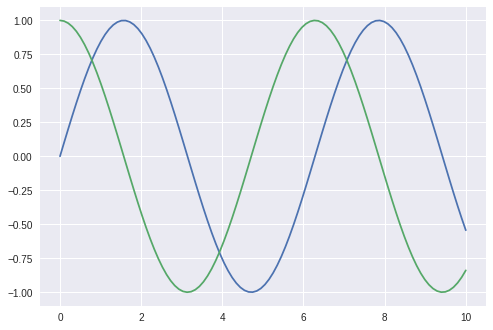

In [161]:
import numpy as np
x = np.linspace(0, 10, 100)
#plt.style.use('default')
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

> After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

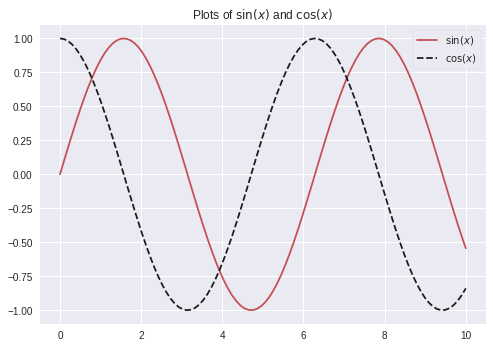

In [162]:
fig=plt.figure()
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'r-', label=r'$\sin(x)$') # r stands for colour and r in label stands for row text
plt.plot(x, np.cos(x), 'k--', label=r'$\cos(x)$')
plt.title('Plots of $\sin(x)$ and $\cos(x)$' )
plt.axis('tight')
plt.legend(frameon=True, loc='upper right', ncol=1,framealpha=0.9)
plt.show()

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [163]:
fig.savefig('my_figure.png')

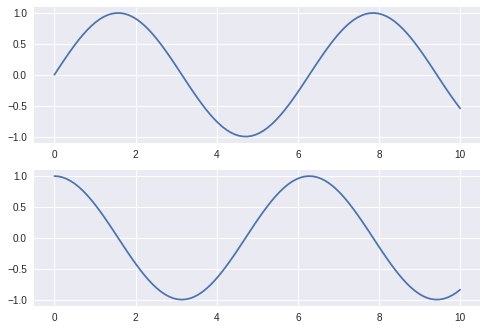

In [164]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

# Working with datafiles

## Loading Data

Now, let’s read our data into a `Pandas` dataframe. We will relax the limit on display columns and rows using the `set_option()` method in Pandas:

In [ ]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [72]:
df=pd.read_csv("https://raw.githubusercontent.com/sijuswamy/PyWorks/main/Pokemon.csv",encoding = 'utf_8')

In [73]:
booleanDictionary = {True: 'TRUE', False: 'FALSE'}
df = df.replace(booleanDictionary)
df.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Stage,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,FALSE
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,FALSE
3,Charmander,Fire,Poison,309,39,52,43,60,50,65,1,FALSE
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,FALSE


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     68 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp.Atk     151 non-null    int64 
 8   Sp.Def     151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    object
dtypes: int64(8), object(4)
memory usage: 14.3+ KB


In [ ]:
print(df.shape)

(151, 12)


### Creating a histogram

We can generate a histogram for any of the numerical columns by calling the `hist()` method on the plt object and passing in the selected column in the data frame. Let’s do this for the speed column, which corresponds to speed of the player.

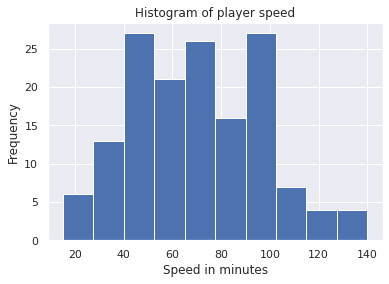

In [87]:
plt.hist(df['Speed'])
plt.xlabel('Speed in minutes')
plt.ylabel('Frequency')
plt.title('Histogram of player speed')
plt.show()

### Scatterplot
To generate a scatter plot in `Matplotlib`, we simply use the `scatter()` method on the `plt` object. Let’s also label the axes and give our plot a title:

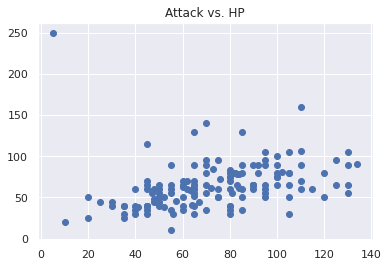

In [88]:
plt.scatter(df['Attack'], df['HP'])
plt.title('Attack vs. HP')
plt.show()

## Barchart

Bar charts are another useful visualization tool for analyzing categories in data. To visualize categorical columns, we first should count the values. We can use the counter method from the collections modules to generate a dictionary of count values for each category in a categorical column. Let’s do this for the Legendary column:

In [77]:
from collections import Counter 

print(Counter(df[('Legendary')]))

Counter({'FALSE': 147, 'TRUE': 4})


>**Note:** We can filter this dictionary using the `most_common` method. Let’s look at the 10 most common nationality values ( you can also use the `least_common` method to analyze infrequent nationality values):



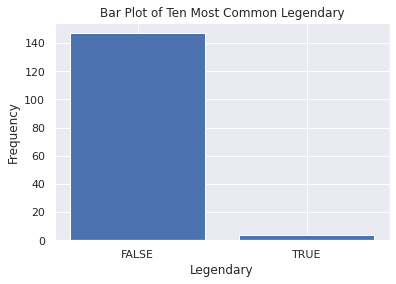

In [89]:
Legendary_dict = dict(Counter(df[('Legendary')]).most_common(2))

plt.bar(Legendary_dict.keys(), Legendary_dict.values())

plt.xlabel('Legendary')

plt.ylabel('Frequency')

plt.title('Bar Plot of Ten Most Common Legendary')
#plt.xticks(rotation=90)
plt.show()

### Generating Pie Charts With `Matplotlib`

Pie charts are a useful way to visualize proportions in your data.

In [90]:
prop = dict(Counter(df['Legendary']))

for key, values in prop.items():

    prop[key] = (values)/len(df)*100

print(prop)

{'FALSE': 97.35099337748345, 'TRUE': 2.6490066225165565}


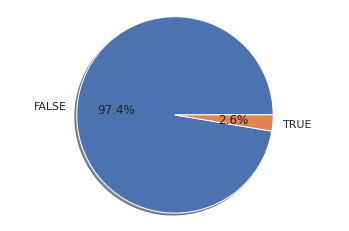

In [91]:
fig1, ax1 = plt.subplots()

ax1.pie(prop.values(), labels=prop.keys(), autopct='%1.1f%%',

        shadow=True, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Box plots

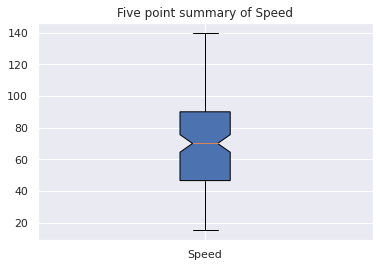

In [92]:
plt.title("Five point summary of Speed")
plt.boxplot(df['Speed'],patch_artist=True, notch=True,labels=['Speed'])
plt.show()

## Data Visualization With Seaborn

`Seaborn` is a library built on top of `Matplotlib` that enables more sophisticated visualization and aesthetic plot formatting. Once you’ve mastered Matplotlib, you may want to move up to Seaborn for more complex visualizations.

For example, simply using the `Seaborn` `set()` method can dramatically improve the appearance of your `Matplotlib` plots. Let’s take a look.

First, `import Seaborn as sns` and reformat all of the figures we generated. At the top of your script, write the following code and rerun:

In [86]:
sns.set()
plt.show()


## Histograms With Seaborn

To regenerate our histogram of the overall column, we use the `histplot` method on the Seaborn object:

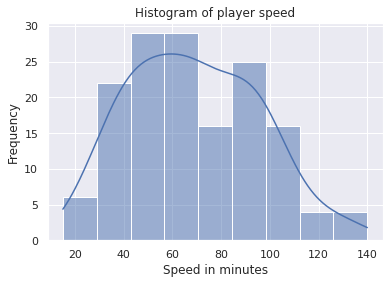

In [109]:
sns.histplot(df['Speed'],kde=True)
plt.xlabel('Speed in minutes')
plt.ylabel('Frequency')
plt.title('Histogram of player speed')
plt.show()

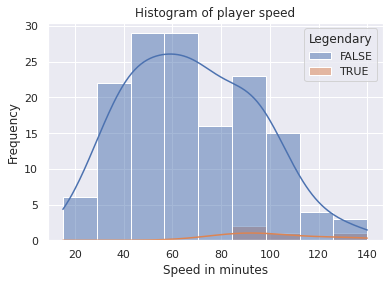

In [116]:
sns.histplot(x='Speed',hue='Legendary',kde=True,data=df)
plt.xlabel('Speed in minutes')
plt.ylabel('Frequency')
plt.title('Histogram of player speed')
plt.show()

## Scatter Plots With Seaborn
Seaborn also makes generating scatter plots straightforward. Let’s recreate the scatter plot from earlier:

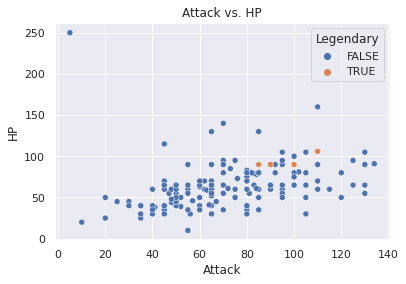

In [98]:
sns.scatterplot(x='Attack', y='HP',hue='Legendary',data=df)
plt.title('Attack vs. HP')
plt.show()

> Alternative method with `lmplot`

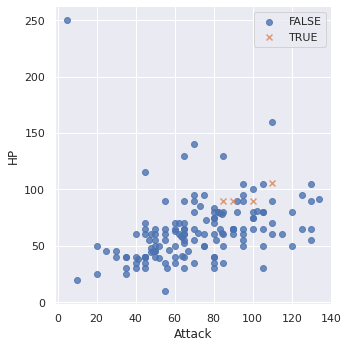

In [101]:
sns.lmplot( x='Attack', y='HP',hue='Legendary', data=df, fit_reg=False,markers=["o", "x"], legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

plt.show()

let’s compare the Attack and Defense stats for our Pokémon:

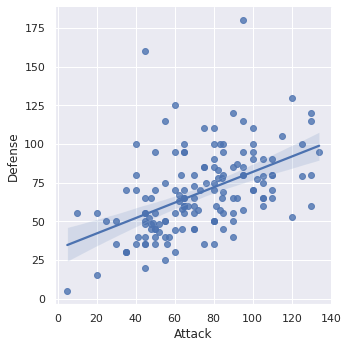

In [115]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
plt.show()

let’s compare the Attack and Defense stats for our Pokémon over Stages

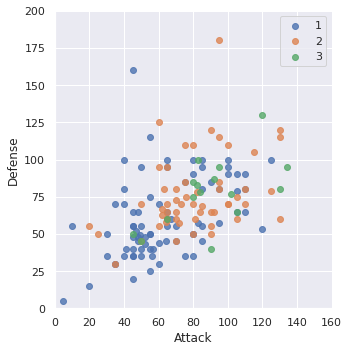

In [120]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, legend=False,
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, 200)
plt.xlim(0, 160)
plt.legend(loc='upper right')
plt.show()

### Boxplot

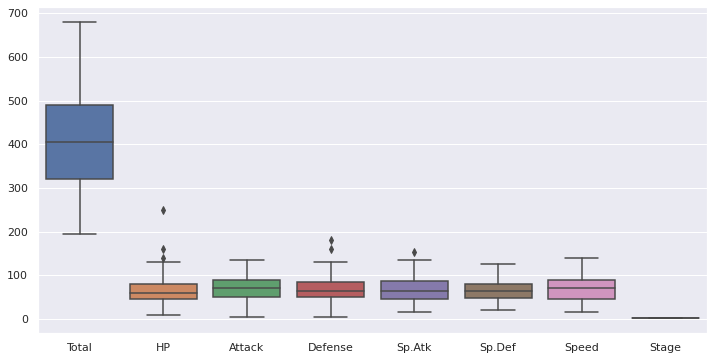

In [122]:
# Boxplot
plt.figure(figsize=(12,6)) # Set plot dimensions
sns.boxplot(data=df)
plt.show()

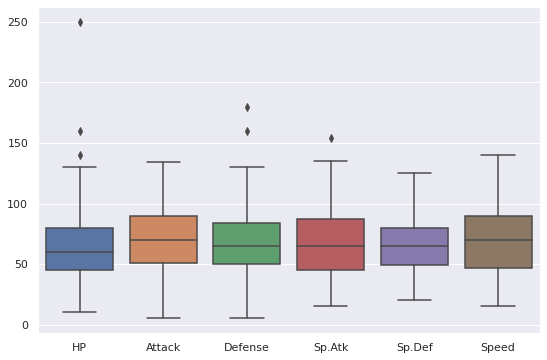

In [124]:
# Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_df)
plt.show()

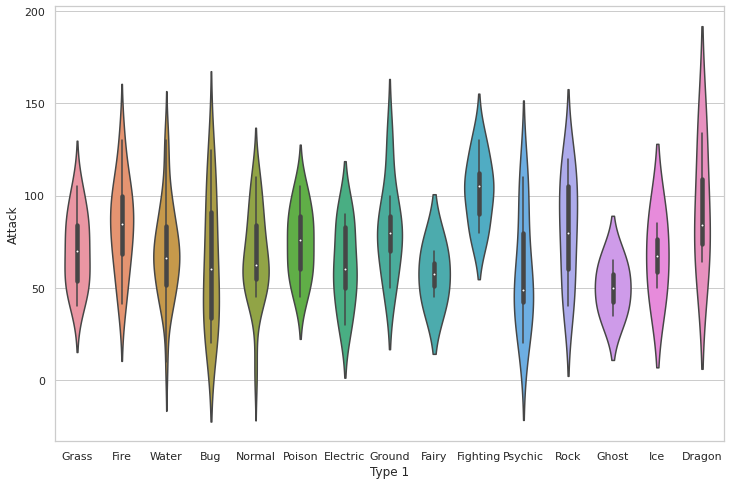

In [125]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df)

### Heatmaps With Seaborn

Seaborn is also known for making correlation heatmaps, which can be used to identify variable dependence. To generate one, first we need to calculate the correlation between a set of numerical columns.

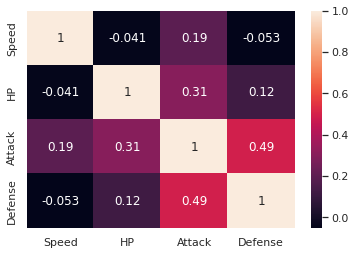

In [103]:
corr = df[['Speed', 'HP', 'Attack', 'Defense']].corr()

sns.heatmap(corr, annot=True)

### Pairs Plots With Seaborn

The last Seaborn tool we’ll discuss is the pairplot method. This allows you to generate a matrix of distributions and scatter plots for a set of numerical features. Let’s do this for age, overall and potential:

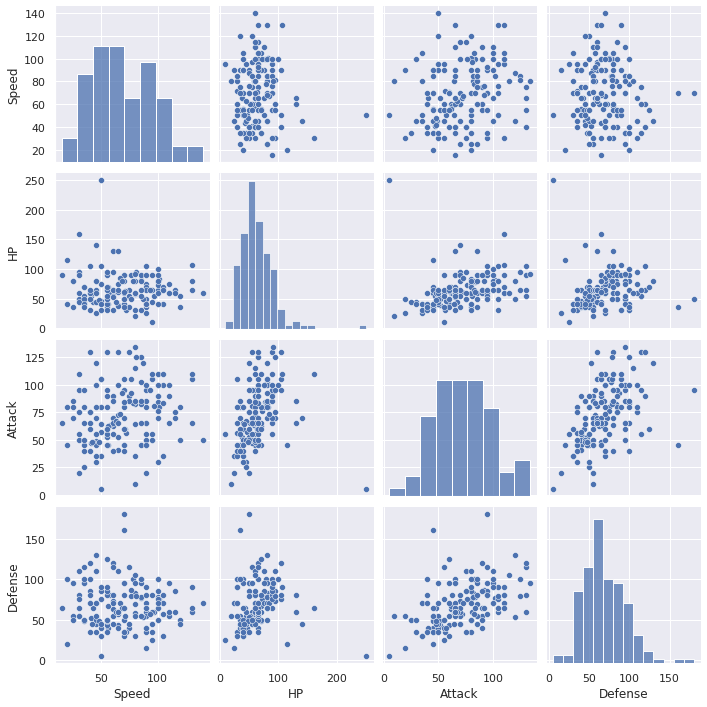

In [106]:
data = df[['Speed', 'HP', 'Attack', 'Defense']]

sns.pairplot(data)
plt.show()

## Bring things together

Let’s conclude our Python Seaborn tutorial by bringing together everything we’ve covered to display all information elegantly in one plot.

First, here’s a reminder of our data format:

In [126]:
stats_df.head()


,Name,Type 1,Type 2,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,Charmander,Fire,Poison,39,52,43,60,50,65
4,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to “melt” them into one column.

To do so, we’ll use Pandas’s `melt() function`. It takes 3 arguments:

- First, the DataFrame to melt.
- Second, ID variables to keep (Pandas will melt all of the other ones).
- Finally, a name for the new, melted variable.
Here’s the output:

In [127]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,Poison,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [128]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


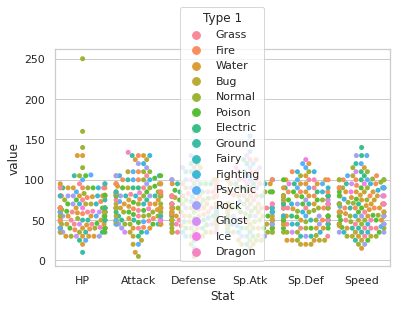

In [139]:
# Swarmplot/stripplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')
plt.show()

In [135]:
#define a custome colour palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

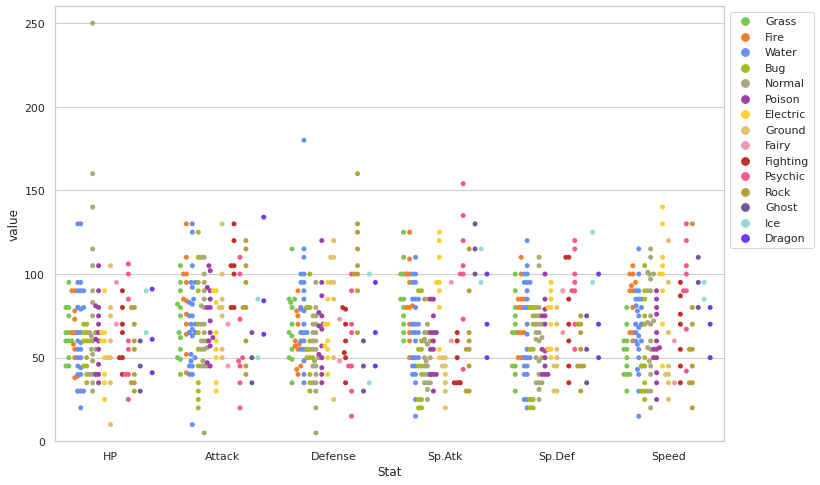

In [140]:
# 1. Enlarge the plot
plt.figure(figsize=(12,8))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

### Countplot or Barplot

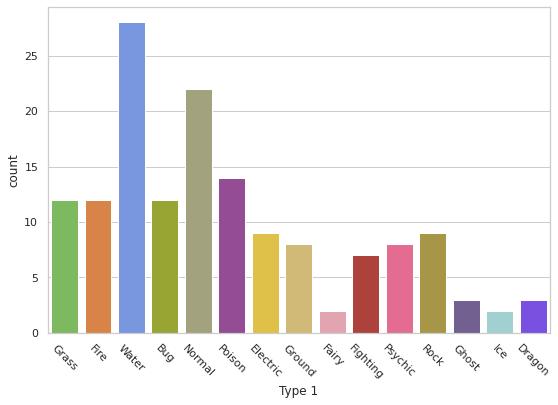

In [142]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(9,6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

## category plot

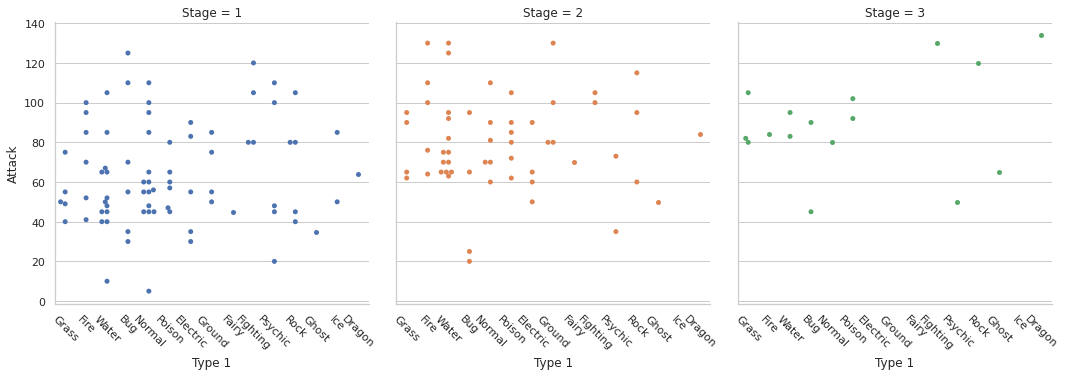

In [146]:
# Categorical Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
plt.show()
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45) 

## Density Plot
Density plots display the distribution between two variables.

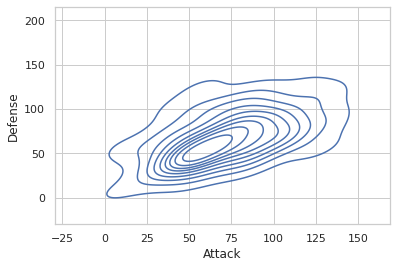

In [147]:
# Density Plot
sns.kdeplot(x='Attack', y='Defense', data=df)
plt.show()

<Figure size 720x432 with 0 Axes>

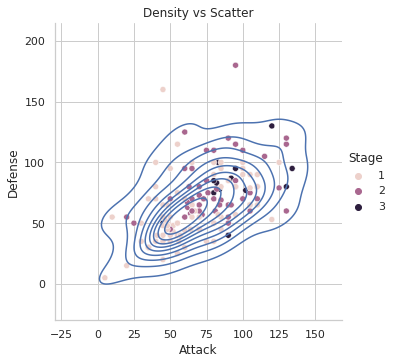

In [151]:
# overlaying with scatterplot
plt.figure(figsize=(10,6))
sns.relplot(x='Attack', y='Defense', hue='Stage', data=df)# creating relational plot
sns.kdeplot(x='Attack', y='Defense', data=df)
#sns.kdeplot(df.Attack, df.Defense)
plt.title('Density vs Scatter')
plt.show()

## Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

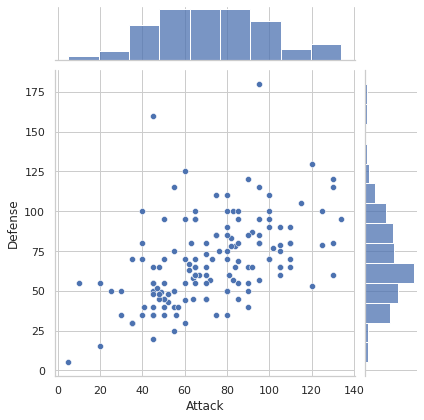

In [154]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)
plt.show()